In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [4]:
df = pd.read_json("EcoDrivingData.json")

FileNotFoundError: File EcoDrivingData.json does not exist

In [ ]:
df.head()

,PartitionKey,id,from_datetime,to_datetime,data
0,NEW-VehicleEcoDriving-2023-01-01T00:00:00.0000...,9c2a617c-7539-11ec-aaba-3743e32733f5,2023-01-01T00:00:00.0000000,2023-01-02T00:00:00.0000000,{'subject_id': '9c2a617c-7539-11ec-aaba-3743e3...
1,NEW-VehicleEcoDriving-2023-01-01T00:00:00.0000...,159e257e-3315-11eb-be67-1fcb9c0fdce7,2023-01-01T00:00:00.0000000,2023-01-02T00:00:00.0000000,{'subject_id': '159e257e-3315-11eb-be67-1fcb9c...
2,NEW-VehicleEcoDriving-2023-01-02T00:00:00.0000...,9c2a617c-7539-11ec-aaba-3743e32733f5,2023-01-02T00:00:00.0000000,2023-01-03T00:00:00.0000000,{'subject_id': '9c2a617c-7539-11ec-aaba-3743e3...
3,NEW-VehicleEcoDriving-2023-01-02T00:00:00.0000...,159e257e-3315-11eb-be67-1fcb9c0fdce7,2023-01-02T00:00:00.0000000,2023-01-03T00:00:00.0000000,{'subject_id': '159e257e-3315-11eb-be67-1fcb9c...
4,NEW-VehicleEcoDriving-2023-01-02T00:00:00.0000...,8c16e20a-5905-11ed-825f-2fd98421a6b2,2023-01-02T00:00:00.0000000,2023-01-03T00:00:00.0000000,{'subject_id': '8c16e20a-5905-11ed-825f-2fd984...


In [ ]:
df.shape

(1500, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PartitionKey   1500 non-null   object
 1   id             1500 non-null   object
 2   from_datetime  1500 non-null   object
 3   to_datetime    1500 non-null   object
 4   data           1500 non-null   object
dtypes: object(5)
memory usage: 58.7+ KB


In [ ]:
x = df["data"]

x[0]

{'subject_id': '9c2a617c-7539-11ec-aaba-3743e32733f5',
 'parameters': {'main_parameters': {'distance': 0,
   'driving_duration': 0,
   'fuel_consumed_count': 0,
   'fuel_consumption_rate': 0,
   'average_weight': 0,
   'average_turning_angle': 0,
   'average_gradient': 0,
   'fuel_consumption_by_weight': None,
   'total_score': 40},
  'acceleration_parameters': {'harsh_acceleration_event_count': 0,
   'good_acceleration_event_count': None,
   'bad_acceleration_event_count': None,
   'harsh_acceleration_event_rate': 0,
   'good_acceleration_event_rate': None,
   'bad_acceleration_event_rate': 0,
   'maximum_acceleration': None,
   'acceleration_score': 100},
  'cornering_parameters': {'cornering_rate': None,
   'cornering_event_count': None,
   'maximum_cornering': None},
  'cruise_control_parameters': {'cruise_control_percentage': None,
   'cruise_control_was_on_duration': None,
   'cruise_control_could_be_on_duration': None,
   'cruise_control_could_be_on_distance': None,
   'cruise_c

In [ ]:
data_expanded = pd.json_normalize(df["data"])
data_expanded.head(2)

,subject_id,parameters.main_parameters.distance,parameters.main_parameters.driving_duration,parameters.main_parameters.fuel_consumed_count,parameters.main_parameters.fuel_consumption_rate,parameters.main_parameters.average_weight,parameters.main_parameters.average_turning_angle,parameters.main_parameters.average_gradient,parameters.main_parameters.fuel_consumption_by_weight,parameters.main_parameters.total_score,...,parameters.braking_parameters.harsh_braking_event_count,parameters.braking_parameters.harsh_braking_event_rate,parameters.braking_parameters.stops_event_count,parameters.braking_parameters.retarder_distance,parameters.braking_parameters.retarder_without_cruise_control_distance,parameters.braking_parameters.parking_brake_abuse_event_count,parameters.braking_parameters.retarder_without_cruise_control_distance_percentage,parameters.braking_parameters.retarder_distance_percentage,parameters.braking_parameters.parking_brake_abuse_rate,parameters.braking_parameters.braking_score
0,9c2a617c-7539-11ec-aaba-3743e32733f5,0.00,0,0.00,0.00,0,0.00,0.00,None,40,...,0,0.00,None,None,None,None,None,None,None,40
1,159e257e-3315-11eb-be67-1fcb9c0fdce7,22.86,3958,1.52,6.66,0,15.48,1.32,None,17,...,242,1058.43,None,None,None,None,None,None,None,0


In [ ]:
# Load Json file into a DataFrame

data = pd.read_json("EcoDrivingData.json")

# Normalise the nested JSon data in the `data` column

data_expanded = pd.json_normalize(df["data"])

# Drop the original `data` column and join the normalised column

df = data.drop(columns = ["data"]).join(data_expanded)

df.head()

,PartitionKey,id,from_datetime,to_datetime,subject_id,parameters.main_parameters.distance,parameters.main_parameters.driving_duration,parameters.main_parameters.fuel_consumed_count,parameters.main_parameters.fuel_consumption_rate,parameters.main_parameters.average_weight,...,parameters.braking_parameters.harsh_braking_event_count,parameters.braking_parameters.harsh_braking_event_rate,parameters.braking_parameters.stops_event_count,parameters.braking_parameters.retarder_distance,parameters.braking_parameters.retarder_without_cruise_control_distance,parameters.braking_parameters.parking_brake_abuse_event_count,parameters.braking_parameters.retarder_without_cruise_control_distance_percentage,parameters.braking_parameters.retarder_distance_percentage,parameters.braking_parameters.parking_brake_abuse_rate,parameters.braking_parameters.braking_score
0,NEW-VehicleEcoDriving-2023-01-01T00:00:00.0000...,9c2a617c-7539-11ec-aaba-3743e32733f5,2023-01-01T00:00:00.0000000,2023-01-02T00:00:00.0000000,9c2a617c-7539-11ec-aaba-3743e32733f5,0.00,0,0.00,0.00,0,...,0,0.00,None,None,None,None,None,None,None,40
1,NEW-VehicleEcoDriving-2023-01-01T00:00:00.0000...,159e257e-3315-11eb-be67-1fcb9c0fdce7,2023-01-01T00:00:00.0000000,2023-01-02T00:00:00.0000000,159e257e-3315-11eb-be67-1fcb9c0fdce7,22.86,3958,1.52,6.66,0,...,242,1058.43,None,None,None,None,None,None,None,0
2,NEW-VehicleEcoDriving-2023-01-02T00:00:00.0000...,9c2a617c-7539-11ec-aaba-3743e32733f5,2023-01-02T00:00:00.0000000,2023-01-03T00:00:00.0000000,9c2a617c-7539-11ec-aaba-3743e32733f5,14.95,2372,0.00,0.00,0,...,0,0.00,None,None,None,None,None,None,None,40
3,NEW-VehicleEcoDriving-2023-01-02T00:00:00.0000...,159e257e-3315-11eb-be67-1fcb9c0fdce7,2023-01-02T00:00:00.0000000,2023-01-03T00:00:00.0000000,159e257e-3315-11eb-be67-1fcb9c0fdce7,194.87,14916,16.66,8.55,0,...,564,289.42,None,None,None,None,None,None,None,0
4,NEW-VehicleEcoDriving-2023-01-02T00:00:00.0000...,8c16e20a-5905-11ed-825f-2fd98421a6b2,2023-01-02T00:00:00.0000000,2023-01-03T00:00:00.0000000,8c16e20a-5905-11ed-825f-2fd98421a6b2,35.37,17700,0.00,0.00,0,...,144,407.11,None,None,None,None,None,None,None,0


In [ ]:
df.shape

(1500, 125)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parameters.main_parameters.distance,1499.0,159.723836,229.273294,0.0,11.3850,48.040,187.2550,1271.55
parameters.main_parameters.driving_duration,1500.0,14916.356667,14822.395493,0.0,3104.5000,10883.000,19573.2500,56892.00
parameters.main_parameters.fuel_consumed_count,1499.0,1.800660,6.289591,0.0,0.0000,0.000,0.0000,77.48
parameters.main_parameters.fuel_consumption_rate,1499.0,1.455264,3.297489,0.0,0.0000,0.000,0.0000,42.86
parameters.main_parameters.average_weight,1500.0,0.000000,0.000000,0.0,0.0000,0.000,0.0000,0.00
parameters.main_parameters.average_turning_angle,1500.0,12.087647,9.655830,0.0,5.4600,11.290,18.9075,96.55
parameters.main_parameters.average_gradient,1500.0,0.586607,0.365839,0.0,0.4600,0.610,0.8300,2.80
parameters.main_parameters.total_score,1500.0,17.712000,14.041860,0.0,6.0000,17.000,23.0000,40.00
parameters.acceleration_parameters.harsh_acceleration_event_count,1500.0,42.720667,70.822020,0.0,0.0000,16.000,56.0000,759.00
parameters.acceleration_parameters.good_acceleration_event_count,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Function to clean the columns

def clean_column_name(col):
    if "parameters" in col:
        return col.split(".")[-1]
    return col

# Apply the function to clean the dataset

df.columns = [clean_column_name(col) for col in df.columns]

df.head(2)

,PartitionKey,id,from_datetime,to_datetime,subject_id,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,average_weight,...,harsh_braking_event_count,harsh_braking_event_rate,stops_event_count,retarder_distance,retarder_without_cruise_control_distance,parking_brake_abuse_event_count,retarder_without_cruise_control_distance_percentage,retarder_distance_percentage,parking_brake_abuse_rate,braking_score
0,NEW-VehicleEcoDriving-2023-01-01T00:00:00.0000...,9c2a617c-7539-11ec-aaba-3743e32733f5,2023-01-01T00:00:00.0000000,2023-01-02T00:00:00.0000000,9c2a617c-7539-11ec-aaba-3743e32733f5,0.00,0,0.00,0.00,0,...,0,0.00,None,None,None,None,None,None,None,40
1,NEW-VehicleEcoDriving-2023-01-01T00:00:00.0000...,159e257e-3315-11eb-be67-1fcb9c0fdce7,2023-01-01T00:00:00.0000000,2023-01-02T00:00:00.0000000,159e257e-3315-11eb-be67-1fcb9c0fdce7,22.86,3958,1.52,6.66,0,...,242,1058.43,None,None,None,None,None,None,None,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,1499.0,159.723836,229.273294,0.0,11.3850,48.040,187.2550,1271.55
driving_duration,1500.0,14916.356667,14822.395493,0.0,3104.5000,10883.000,19573.2500,56892.00
fuel_consumed_count,1499.0,1.800660,6.289591,0.0,0.0000,0.000,0.0000,77.48
fuel_consumption_rate,1499.0,1.455264,3.297489,0.0,0.0000,0.000,0.0000,42.86
average_weight,1500.0,0.000000,0.000000,0.0,0.0000,0.000,0.0000,0.00
average_turning_angle,1500.0,12.087647,9.655830,0.0,5.4600,11.290,18.9075,96.55
average_gradient,1500.0,0.586607,0.365839,0.0,0.4600,0.610,0.8300,2.80
total_score,1500.0,17.712000,14.041860,0.0,6.0000,17.000,23.0000,40.00
harsh_acceleration_event_count,1500.0,42.720667,70.822020,0.0,0.0000,16.000,56.0000,759.00
good_acceleration_event_count,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove Columns with Null values greater than 3/4 of the len of the df

threshold = len(df) * (4/5)

threshold

1200.0

In [ ]:
# Drop the columns with Null values Greater than or equal to the threshould set above

df = df.dropna(thresh = threshold, axis = 1)

df.shape

(1500, 34)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,1499.0,159.723836,229.273294,0.0,11.3850,48.040,187.2550,1271.55
driving_duration,1500.0,14916.356667,14822.395493,0.0,3104.5000,10883.000,19573.2500,56892.00
fuel_consumed_count,1499.0,1.800660,6.289591,0.0,0.0000,0.000,0.0000,77.48
fuel_consumption_rate,1499.0,1.455264,3.297489,0.0,0.0000,0.000,0.0000,42.86
average_weight,1500.0,0.000000,0.000000,0.0,0.0000,0.000,0.0000,0.00
average_turning_angle,1500.0,12.087647,9.655830,0.0,5.4600,11.290,18.9075,96.55
average_gradient,1500.0,0.586607,0.365839,0.0,0.4600,0.610,0.8300,2.80
total_score,1500.0,17.712000,14.041860,0.0,6.0000,17.000,23.0000,40.00
harsh_acceleration_event_count,1500.0,42.720667,70.822020,0.0,0.0000,16.000,56.0000,759.00
harsh_acceleration_event_rate,1499.0,85.244123,732.690428,0.0,0.0000,16.480,54.6850,23529.41


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PartitionKey                    1500 non-null   object 
 1   id                              1500 non-null   object 
 2   from_datetime                   1500 non-null   object 
 3   to_datetime                     1500 non-null   object 
 4   subject_id                      1500 non-null   object 
 5   distance                        1499 non-null   float64
 6   driving_duration                1500 non-null   int64  
 7   fuel_consumed_count             1499 non-null   float64
 8   fuel_consumption_rate           1499 non-null   float64
 9   average_weight                  1500 non-null   int64  
 10  average_turning_angle           1500 non-null   float64
 11  average_gradient                1500 non-null   float64
 12  total_score                     15

In [ ]:
#df = df.dropna()

In [ ]:
#df.shape

In [ ]:
average = df[["average_speed", "average_driving_speed"]]

In [ ]:
average

,average_speed,average_driving_speed
0,0.00,0.00
1,20.80,20.80
2,22.68,22.68
3,47.03,50.43
4,7.19,13.86
...,...,...
1495,52.04,NaN
1496,16.74,17.24
1497,0.59,0.59
1498,47.53,54.20


In [ ]:
columns_to_drop = ["PartitionKey","id", "from_datetime", "subject_id", "to_datetime"] # not needed

df = df.drop(columns = columns_to_drop)

In [ ]:
df.head(2)

,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,average_weight,average_turning_angle,average_gradient,total_score,harsh_acceleration_event_count,harsh_acceleration_event_rate,...,overspeeding_duration,overspeeding_percentage,speed_score,extreme_braking_event_count,extreme_braking_event_rate,normal_braking_event_count,normal_braking_event_rate,harsh_braking_event_count,harsh_braking_event_rate,braking_score
0,0.00,0,0.00,0.00,0,0.00,0.00,40,0,0.00,...,0,0.00,0,0,0.00,0,0.00,0,0.00,40
1,22.86,3958,1.52,6.66,0,15.48,1.32,17,37,161.83,...,69,1.74,0,89,389.26,123,537.96,242,1058.43,0


In [ ]:
df.corr()

,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,average_weight,average_turning_angle,average_gradient,total_score,harsh_acceleration_event_count,harsh_acceleration_event_rate,...,overspeeding_duration,overspeeding_percentage,speed_score,extreme_braking_event_count,extreme_braking_event_rate,normal_braking_event_count,normal_braking_event_rate,harsh_braking_event_count,harsh_braking_event_rate,braking_score
distance,1.000000,0.939920,0.139914,-0.069342,NaN,-0.278735,0.032619,-0.239572,0.262407,-0.055641,...,0.706223,0.537802,NaN,0.321896,-0.079037,0.744628,-0.177926,0.443621,-0.120443,-0.289260
driving_duration,0.939920,1.000000,0.154690,-0.001503,NaN,-0.131865,0.160420,-0.411184,0.334487,-0.056909,...,0.654936,0.493318,NaN,0.399234,-0.073419,0.786557,-0.123726,0.534464,-0.098876,-0.436032
fuel_consumed_count,0.139914,0.154690,1.000000,0.608470,NaN,-0.003587,0.124390,-0.065642,0.725838,0.008936,...,0.519928,0.615135,NaN,0.736539,0.026461,0.177931,-0.036364,0.739160,0.051943,-0.165437
fuel_consumption_rate,-0.069342,-0.001503,0.608470,1.000000,NaN,0.160476,0.195032,-0.151823,0.567219,0.123200,...,0.173354,0.303677,NaN,0.593373,0.137960,0.007651,0.066874,0.575423,0.223512,-0.234728
average_weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_turning_angle,-0.278735,-0.131865,-0.003587,0.160476,NaN,1.000000,0.659947,-0.542501,0.012097,-0.014935,...,-0.229655,-0.189127,NaN,0.008507,0.019344,-0.132198,0.294419,0.004001,0.091621,-0.579073
average_gradient,0.032619,0.160420,0.124390,0.195032,NaN,0.659947,1.000000,-0.545045,0.251838,-0.024501,...,0.019868,0.061636,NaN,0.252704,0.012751,0.237163,0.298535,0.253375,0.076632,-0.661737
total_score,-0.239572,-0.411184,-0.065642,-0.151823,NaN,-0.542501,-0.545045,1.000000,-0.227002,-0.072554,...,-0.177838,-0.154354,NaN,-0.263880,-0.072872,-0.187871,-0.162667,-0.326012,-0.106487,0.861509
harsh_acceleration_event_count,0.262407,0.334487,0.725838,0.567219,NaN,0.012097,0.251838,-0.227002,1.000000,0.024593,...,0.473870,0.545740,NaN,0.961288,0.056985,0.407365,0.011856,0.912733,0.092945,-0.348136
harsh_acceleration_event_rate,-0.055641,-0.056909,0.008936,0.123200,NaN,-0.014935,-0.024501,-0.072554,0.024593,1.000000,...,-0.032089,-0.024561,NaN,0.017378,0.623847,-0.044601,0.055738,0.001104,0.494339,-0.039069


In [ ]:
# Drop columns with zero entries only

zeros_column = ["speed_score", "average_weight", "cruise_control_score", "engine_score"]

df = df.drop(columns = zeros_column)

df.shape

(1500, 25)

In [ ]:
df.corr()

,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,average_turning_angle,average_gradient,total_score,harsh_acceleration_event_count,harsh_acceleration_event_rate,acceleration_score,...,maximum_speed,overspeeding_duration,overspeeding_percentage,extreme_braking_event_count,extreme_braking_event_rate,normal_braking_event_count,normal_braking_event_rate,harsh_braking_event_count,harsh_braking_event_rate,braking_score
distance,1.000000,0.939920,0.139914,-0.069342,-0.278735,0.032619,-0.239572,0.262407,-0.055641,-0.303470,...,0.671438,0.706223,0.537802,0.321896,-0.079037,0.744628,-0.177926,0.443621,-0.120443,-0.289260
driving_duration,0.939920,1.000000,0.154690,-0.001503,-0.131865,0.160420,-0.411184,0.334487,-0.056909,-0.448912,...,0.768942,0.654936,0.493318,0.399234,-0.073419,0.786557,-0.123726,0.534464,-0.098876,-0.436032
fuel_consumed_count,0.139914,0.154690,1.000000,0.608470,-0.003587,0.124390,-0.065642,0.725838,0.008936,-0.170716,...,0.195035,0.519928,0.615135,0.736539,0.026461,0.177931,-0.036364,0.739160,0.051943,-0.165437
fuel_consumption_rate,-0.069342,-0.001503,0.608470,1.000000,0.160476,0.195032,-0.151823,0.567219,0.123200,-0.263161,...,0.104517,0.173354,0.303677,0.593373,0.137960,0.007651,0.066874,0.575423,0.223512,-0.234728
average_turning_angle,-0.278735,-0.131865,-0.003587,0.160476,1.000000,0.659947,-0.542501,0.012097,-0.014935,-0.541695,...,0.185559,-0.229655,-0.189127,0.008507,0.019344,-0.132198,0.294419,0.004001,0.091621,-0.579073
average_gradient,0.032619,0.160420,0.124390,0.195032,0.659947,1.000000,-0.545045,0.251838,-0.024501,-0.651255,...,0.482745,0.019868,0.061636,0.252704,0.012751,0.237163,0.298535,0.253375,0.076632,-0.661737
total_score,-0.239572,-0.411184,-0.065642,-0.151823,-0.542501,-0.545045,1.000000,-0.227002,-0.072554,0.861264,...,-0.578789,-0.177838,-0.154354,-0.263880,-0.072872,-0.187871,-0.162667,-0.326012,-0.106487,0.861509
harsh_acceleration_event_count,0.262407,0.334487,0.725838,0.567219,0.012097,0.251838,-0.227002,1.000000,0.024593,-0.359510,...,0.389958,0.473870,0.545740,0.961288,0.056985,0.407365,0.011856,0.912733,0.092945,-0.348136
harsh_acceleration_event_rate,-0.055641,-0.056909,0.008936,0.123200,-0.014935,-0.024501,-0.072554,0.024593,1.000000,-0.069376,...,-0.072271,-0.032089,-0.024561,0.017378,0.623847,-0.044601,0.055738,0.001104,0.494339,-0.039069
acceleration_score,-0.303470,-0.448912,-0.170716,-0.263161,-0.541695,-0.651255,0.861264,-0.359510,-0.069376,1.000000,...,-0.676700,-0.254742,-0.254745,-0.400540,-0.066668,-0.249599,-0.166705,-0.470428,-0.121541,0.944259


In [ ]:
average = df[["average_speed", "average_driving_speed"]]

In [ ]:
average.corr()

,average_speed,average_driving_speed
average_speed,1.000000,0.988158
average_driving_speed,0.988158,1.000000


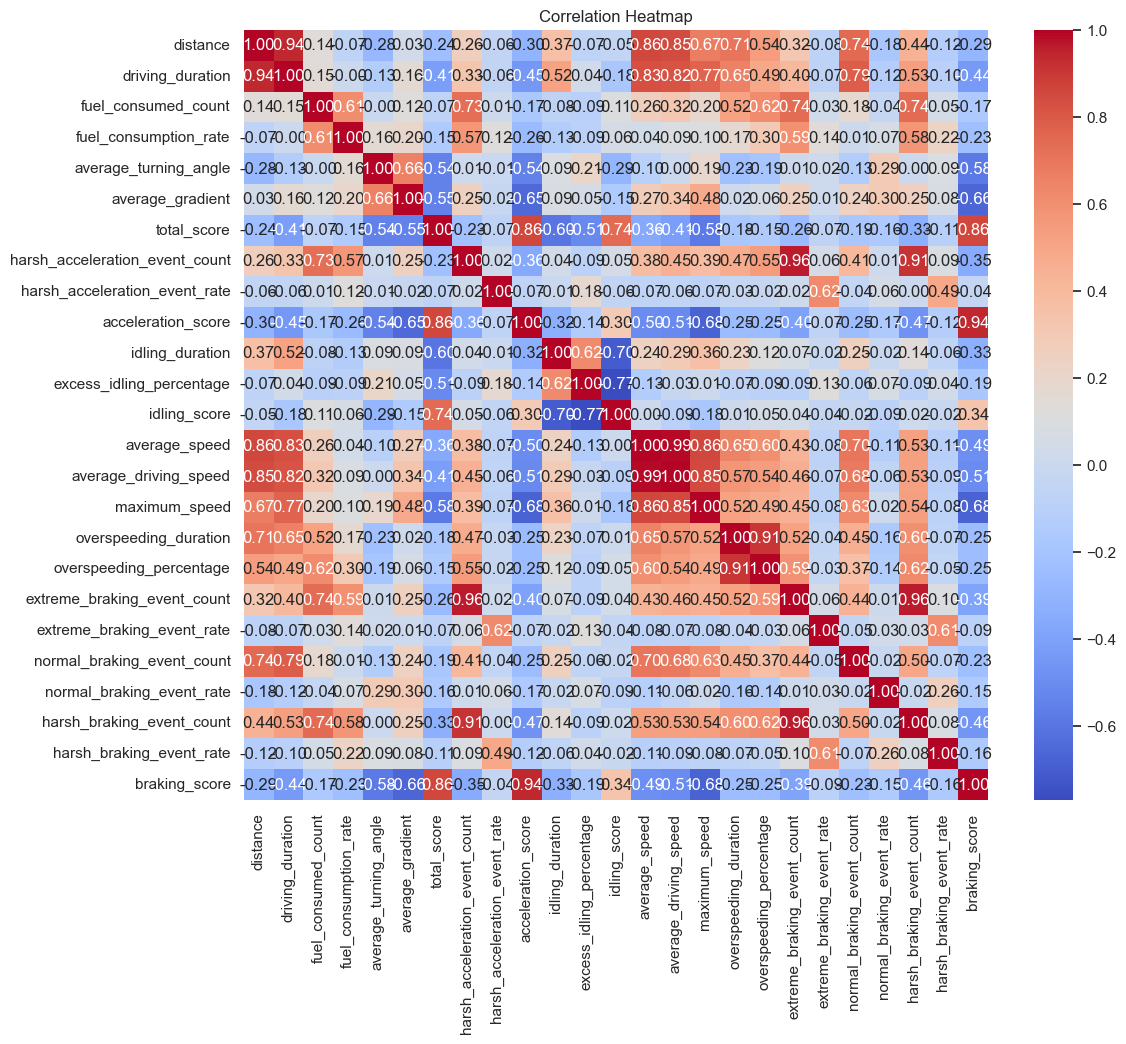

In [ ]:
# Create a heatmap
# Calculate the correlation coefficient
corr = df.corr()

#Plot the correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot = True, fmt=".2f", cmap = "coolwarm", cbar = True)

plt.title("Correlation Heatmap")

plt.show()

In [ ]:
# drop average_driving_speed, it is similar to average_speed

df = df.drop(columns = "average_driving_speed")

df.shape

(1500, 24)

In [ ]:
df.isnull().sum()

distance                          1
driving_duration                  0
fuel_consumed_count               1
fuel_consumption_rate             1
average_turning_angle             0
average_gradient                  0
total_score                       0
harsh_acceleration_event_count    0
harsh_acceleration_event_rate     1
acceleration_score                0
idling_duration                   0
excess_idling_percentage          0
idling_score                      0
average_speed                     1
maximum_speed                     0
overspeeding_duration             0
overspeeding_percentage           0
extreme_braking_event_count       0
extreme_braking_event_rate        1
normal_braking_event_count        0
normal_braking_event_rate         1
harsh_braking_event_count         0
harsh_braking_event_rate          1
braking_score                     0
dtype: int64

In [ ]:
# Dropp Null columns
df = df.dropna()

df.shape

(1499, 24)

In [ ]:
df.isnull().sum()

distance                          0
driving_duration                  0
fuel_consumed_count               0
fuel_consumption_rate             0
average_turning_angle             0
average_gradient                  0
total_score                       0
harsh_acceleration_event_count    0
harsh_acceleration_event_rate     0
acceleration_score                0
idling_duration                   0
excess_idling_percentage          0
idling_score                      0
average_speed                     0
maximum_speed                     0
overspeeding_duration             0
overspeeding_percentage           0
extreme_braking_event_count       0
extreme_braking_event_rate        0
normal_braking_event_count        0
normal_braking_event_rate         0
harsh_braking_event_count         0
harsh_braking_event_rate          0
braking_score                     0
dtype: int64

### Bulid Model

#### Import Libraries

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

#### Standardize Data

In [ ]:
# Instantiate standard scaler
data_f=df
scaler = StandardScaler()

X = scaler.fit_transform(df)

In [ ]:
X[0]

array([-0.69688509, -1.00733909, -0.28638767, -0.44147205, -1.2533404 ,
       -1.60590339,  1.58722162, -0.60368737, -0.11638281,  1.67757246,
       -0.61658203, -0.57918063,  0.71423623, -1.19712379, -1.72225693,
       -0.44949061, -0.44169975, -0.6750298 , -0.18532648, -0.81235111,
       -0.65820463, -0.7943246 , -0.31983157,  1.76269668])

#### K-means Clustering

The kmeans clustering will be in 3 clusters, since we are considering 3 levels:
- `low risk`
- `medium risk`
- `high risk`

In [ ]:
# Define the number of clusters

clusters = 3

#Instantiate model
model_k = KMeans(n_clusters=clusters, random_state=42, n_init=1) # init = "kmeans++"

# Fit scaled data into the model

model_k.fit(X)

KMeans(n_clusters=3, n_init=1, random_state=42)

In [ ]:
model_k.labels_

array([1, 0, 1, ..., 1, 2, 1])

In [ ]:
# Add the cluster labels to the DataFrame

df["cluster"] = model_k.labels_

df.head()

,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,average_turning_angle,average_gradient,total_score,harsh_acceleration_event_count,harsh_acceleration_event_rate,acceleration_score,...,overspeeding_duration,overspeeding_percentage,extreme_braking_event_count,extreme_braking_event_rate,normal_braking_event_count,normal_braking_event_rate,harsh_braking_event_count,harsh_braking_event_rate,braking_score,cluster
0,0.00,0,0.00,0.00,0.00,0.00,40,0,0.00,100,...,0,0.00,0,0.00,0,0.00,0,0.00,40,1
1,22.86,3958,1.52,6.66,15.48,1.32,17,37,161.83,0,...,69,1.74,89,389.26,123,537.96,242,1058.43,0,0
2,14.95,2372,0.00,0.00,9.29,0.62,40,0,0.00,100,...,0,0.00,0,0.00,63,421.55,0,0.00,40,1
3,194.87,14916,16.66,8.55,12.47,0.74,13,157,80.56,0,...,3234,21.68,285,146.25,278,142.66,564,289.42,0,2
4,35.37,17700,0.00,0.00,23.17,0.82,0,30,84.82,0,...,0,0.00,43,121.57,166,469.31,144,407.11,0,0


##### Visualise the clusters

Reduce the dimensions of the data set using `PCA` - Principal Component Analysis

In [ ]:
# Reduce Dimensions

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_pca

array([[-4.10576557,  2.28058945],
       [ 0.41439796, -0.85798265],
       [-2.72514683,  1.31485363],
       ...,
       [-3.73017316,  1.81177151],
       [ 3.78356483, -0.3099546 ],
       [-4.10576557,  2.28058945]])

In [ ]:
# Create a DataFrame for PCA results
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df['cluster']

df_pca.head()

,PCA1,PCA2,cluster
0,-4.105766,2.280589,1.0
1,0.414398,-0.857983,0.0
2,-2.725147,1.314854,1.0
3,5.404923,2.601539,2.0
4,0.556376,-4.165134,0.0


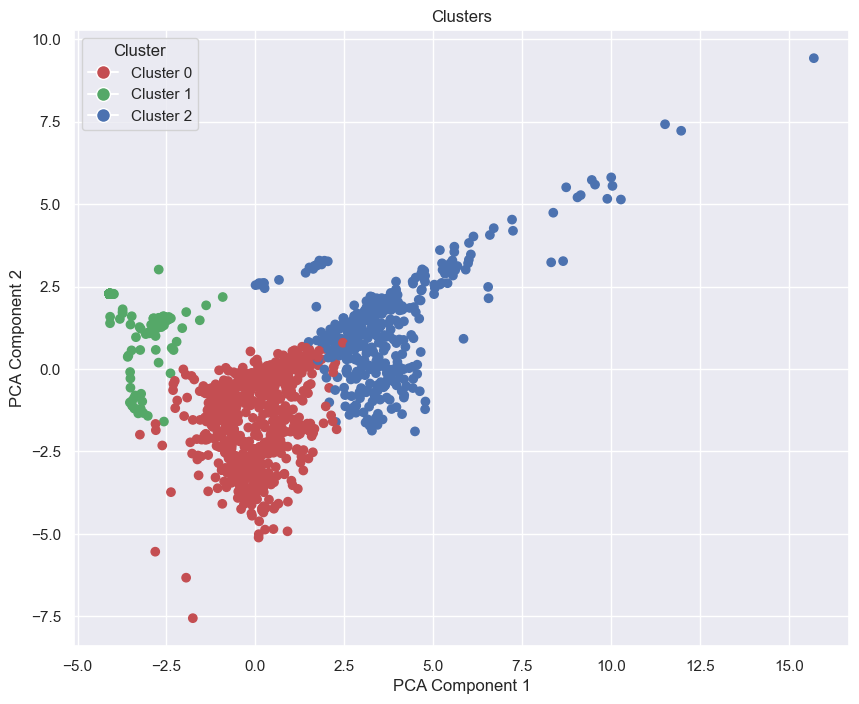

In [ ]:
# Define colors for the clusters (RGB)
colors = ['r', 'g', 'b']

# Map each cluster number to its corresponding color
cluster_colors = df['cluster'].map({0: 'r', 1: 'g', 2: 'b'})

# Plot the PCA results with cluster labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_colors)

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {i}')
           for i, color in enumerate(colors)]
plt.legend(handles=handles, title='Cluster')

plt.title("Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.show()


#### Hierarchical Clustering
For hierarchical clustering, we use AgglomerativeClustering with 3 clusters, since we are considering 3 levels:

- `low risk`
- `medium risk`
- `high risk`

In [ ]:
# Define the number of clusters
num_clusters = 3

# Fit hierarchical clustering
model_h = AgglomerativeClustering(n_clusters=num_clusters)

df['cluster2'] = model_h.fit_predict(X)

In [ ]:
df.head()

,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,average_turning_angle,average_gradient,total_score,harsh_acceleration_event_count,harsh_acceleration_event_rate,acceleration_score,...,overspeeding_percentage,extreme_braking_event_count,extreme_braking_event_rate,normal_braking_event_count,normal_braking_event_rate,harsh_braking_event_count,harsh_braking_event_rate,braking_score,cluster,cluster2
0,0.00,0,0.00,0.00,0.00,0.00,40,0,0.00,100,...,0.00,0,0.00,0,0.00,0,0.00,40,1,1
1,22.86,3958,1.52,6.66,15.48,1.32,17,37,161.83,0,...,1.74,89,389.26,123,537.96,242,1058.43,0,0,2
2,14.95,2372,0.00,0.00,9.29,0.62,40,0,0.00,100,...,0.00,0,0.00,63,421.55,0,0.00,40,1,1
3,194.87,14916,16.66,8.55,12.47,0.74,13,157,80.56,0,...,21.68,285,146.25,278,142.66,564,289.42,0,2,0
4,35.37,17700,0.00,0.00,23.17,0.82,0,30,84.82,0,...,0.00,43,121.57,166,469.31,144,407.11,0,0,2


#### Visualise Clusters

In [ ]:
# Create a DataFrame for PCA results
df_pca2 = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca2['cluster'] = df['cluster2']

df_pca2.head()

,PCA1,PCA2,cluster
0,-4.105766,2.280589,1.0
1,0.414398,-0.857983,2.0
2,-2.725147,1.314854,1.0
3,5.404923,2.601539,0.0
4,0.556376,-4.165134,2.0


In [ ]:
df.head()

,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,average_turning_angle,average_gradient,total_score,harsh_acceleration_event_count,harsh_acceleration_event_rate,acceleration_score,...,overspeeding_percentage,extreme_braking_event_count,extreme_braking_event_rate,normal_braking_event_count,normal_braking_event_rate,harsh_braking_event_count,harsh_braking_event_rate,braking_score,cluster,cluster2
0,0.00,0,0.00,0.00,0.00,0.00,40,0,0.00,100,...,0.00,0,0.00,0,0.00,0,0.00,40,1,1
1,22.86,3958,1.52,6.66,15.48,1.32,17,37,161.83,0,...,1.74,89,389.26,123,537.96,242,1058.43,0,0,2
2,14.95,2372,0.00,0.00,9.29,0.62,40,0,0.00,100,...,0.00,0,0.00,63,421.55,0,0.00,40,1,1
3,194.87,14916,16.66,8.55,12.47,0.74,13,157,80.56,0,...,21.68,285,146.25,278,142.66,564,289.42,0,2,0
4,35.37,17700,0.00,0.00,23.17,0.82,0,30,84.82,0,...,0.00,43,121.57,166,469.31,144,407.11,0,0,2


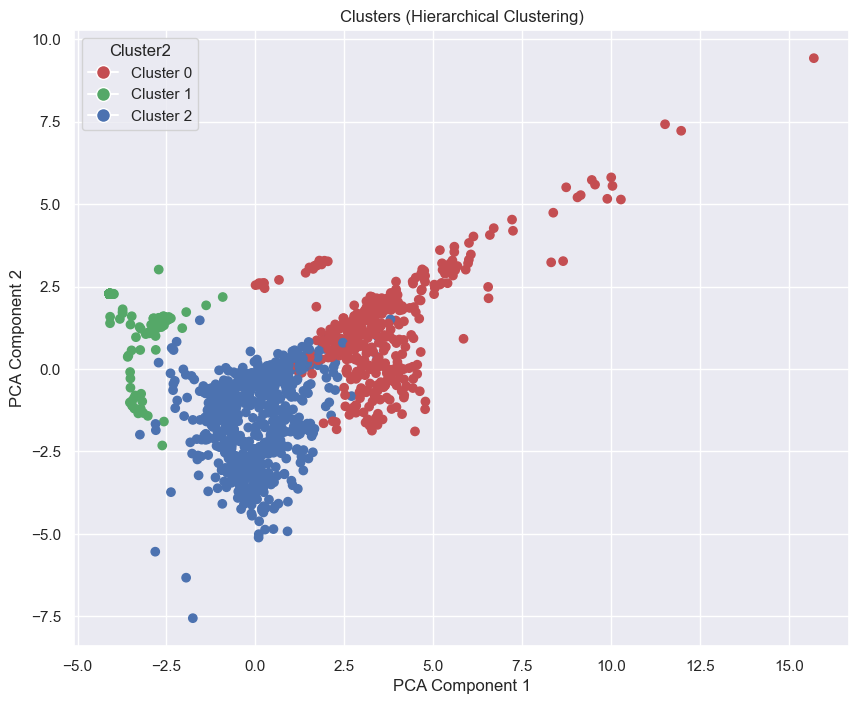

In [ ]:
# Define colors for the clusters (RGB)
colors = ['r', 'g', 'b']

# Map each cluster number to its corresponding color
cluster_colors = df['cluster2'].map({0: 'r', 1: 'g', 2: 'b'})

# Plot the PCA results with cluster labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_colors)

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {i}')
           for i, color in enumerate(colors)]
plt.legend(handles=handles, title='Cluster2')

plt.title("Clusters (Hierarchical Clustering)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [ ]:
data_f.columns

NameError: name 'data_f' is not defined

In [ ]:
data_f['average_speed']=data_f['distance']/data_f['driving_duration']


NameError: name 'data_f' is not defined

In [ ]:
#defining list of feature column to be used to cluster data (test case 1 and 2)
feature_col_1=['total_score','acceleration_score','braking_score','idling_score']

feature_col_2=['distance','driving_duration','fuel_consumed_count','fuel_consumption_rate','harsh_acceleration_event_count','overspeeding_percentage','extreme_braking_event_count','harsh_braking_event_count','normal_braking_event_count']

In [ ]:
scaler=StandardScaler()
# unsupervised model to define data into low risk, high and medium
model_1=AgglomerativeClustering(n_clusters=3,linkage='average')

#feature for test case 1
df_feature_1=data_f[feature_col_1]
#feature for test case 2
df_feature_2=data_f[feature_col_2]

#transform features to reduce extremes
scaled_df_1=scaler.fit_transform(df_feature_1)
scaled_df_2=scaler.fit_transform(df_feature_2)

clus_model1=model_1.fit(scaled_df_1)
clus_model2=model_1.fit(scaled_df_2)

cluster_label_1=clus_model1.labels_
cluster_label_2=clus_model2.labels_

df_feature_1['risk_type']=cluster_label_1
df_feature_2['risk_type']=cluster_label_2

df_feature_1.head()
df_feature_2.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11624\223641518.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature_1['risk_type']=cluster_label_1
C:\Users\user\AppData\Local\Temp\ipykernel_11624\223641518.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature_2['risk_type']=cluster_label_2


,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,harsh_acceleration_event_count,overspeeding_percentage,extreme_braking_event_count,harsh_braking_event_count,normal_braking_event_count,risk_type
0,0.00,0,0.00,0.00,0,0.00,0,0,0,2
1,22.86,3958,1.52,6.66,37,1.74,89,242,123,2
2,14.95,2372,0.00,0.00,0,0.00,0,0,63,2
3,194.87,14916,16.66,8.55,157,21.68,285,564,278,2
4,35.37,17700,0.00,0.00,30,0.00,43,144,166,2


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
new_data_1=df_feature_1.drop('risk_type',axis=1)
new_data_2=df_feature_2.drop('risk_type',axis=1)

target_1=df_feature_1['risk_type']
target_2=df_feature_2['risk_type']

In [ ]:
#split to train data for feature col 1
x_train,x_test,y_train,y_test=train_test_split(df_feature_1[feature_col_1],df_feature_1['risk_type'],test_size=0.2,random_state=42)

#split to train data for feature col 2
x_train2,x_test2,y_train2,y_test2=train_test_split(df_feature_2[feature_col_2],df_feature_2['risk_type'],test_size=0.2,random_state=42)

In [ ]:
#test for correlation
x_train.corr()
x_train2.corr()

,distance,driving_duration,fuel_consumed_count,fuel_consumption_rate,harsh_acceleration_event_count,overspeeding_percentage,extreme_braking_event_count,harsh_braking_event_count,normal_braking_event_count
distance,1.000000,0.939074,0.146503,-0.068996,0.256394,0.541840,0.317647,0.442746,0.737476
driving_duration,0.939074,1.000000,0.150260,-0.011261,0.325110,0.499012,0.389885,0.527225,0.786964
fuel_consumed_count,0.146503,0.150260,1.000000,0.600047,0.732690,0.635526,0.734004,0.734380,0.184884
fuel_consumption_rate,-0.068996,-0.011261,0.600047,1.000000,0.558364,0.310425,0.582153,0.563371,0.009428
harsh_acceleration_event_count,0.256394,0.325110,0.732690,0.558364,1.000000,0.551771,0.962045,0.917033,0.422053
overspeeding_percentage,0.541840,0.499012,0.635526,0.310425,0.551771,1.000000,0.593502,0.638027,0.380830
extreme_braking_event_count,0.317647,0.389885,0.734004,0.582153,0.962045,0.593502,1.000000,0.962334,0.460196
harsh_braking_event_count,0.442746,0.527225,0.734380,0.563371,0.917033,0.638027,0.962334,1.000000,0.517955
normal_braking_event_count,0.737476,0.786964,0.184884,0.009428,0.422053,0.380830,0.460196,0.517955,1.000000


In [ ]:
#model
models={"RFC":RandomForestClassifier(n_estimators=120,random_state=42),
"LR":LogisticRegression(random_state=42)
}

In [ ]:
#model training and evaluation from using scores
for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy_report=accuracy_score(y_test,y_pred)
    f1score=f1_score(y_test,y_pred,average='weighted')
    report=classification_report(y_test,y_pred)
    print(f"\nModel:{model_name}")
    print(f"accuracy:{accuracy_report:.3f}")
    print(f"f1_score:{f1score:.2f}")
    print(report)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.


Model:RFC
accuracy:0.993
f1_score:0.99
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.99      1.00      1.00       298

    accuracy                           0.99       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.99      0.99      0.99       300


Model:LR
accuracy:0.993
f1_score:0.99
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.99      1.00      1.00       298

    accuracy                           0.99       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.99      0.99      0.99       300



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

In [ ]:
#model training and evaluation with first data using support vector machine
svc_model=SVC(kernel="linear",random_state=42)
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
accuracy_report=accuracy_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred,average='weighted')
report=classification_report(y_test,y_pred)
print(f"\nModel:SVC")
print(f"accuracy:{accuracy_report:.3f}")
print(f"f1_score:{f1score:.2f}")
print(report)


Model:SVC
accuracy:0.993
f1_score:0.99
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.99      1.00      1.00       298

    accuracy                           0.99       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.99      0.99      0.99       300



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

In [ ]:
#model training and evaluation from using scores
for model_name,model in models.items():
    model.fit(x_train2,y_train2)
    y_pred=model.predict(x_test2)
    accuracy_report=accuracy_score(y_test2,y_pred)
    f1score=f1_score(y_test2,y_pred,average='weighted')
    report=classification_report(y_test2,y_pred)
    print(f"\nModel:{model_name}")
    print(f"accuracy:{accuracy_report:.3f}")
    print(f"f1_score:{f1score:.2f}")
    print(report)


Model:RFC
accuracy:1.000
f1_score:1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           2       1.00      1.00      1.00       298

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


Model:LR
accuracy:0.990
f1_score:0.99
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.99      1.00      0.99       298

    accuracy                           0.99       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.99      0.99      0.99       300



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#support vector machine model for the second form of features

svc_model=SVC(kernel="linear",random_state=42)
svc_model.fit(x_train2,y_train2)
y_pred=svc_model.predict(x_test2)
accuracy_report=accuracy_score(y_test2,y_pred)
f1score=f1_score(y_test2,y_pred,average='weighted')
report=classification_report(y_test2,y_pred)
print(f"\nModel:SVC")
print(f"accuracy:{accuracy_report:.3f}")
print(f"f1_score:{f1score:.2f}")
print(report)


Model:SVC
accuracy:1.000
f1_score:1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           2       1.00      1.00      1.00       298

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
"""
insights from result show that there are no enough data for certain class of data like low risk  (class 0) and medium risk (lass 1). As a result,
the model has 298 rows of data for high risk for testing prediction and 2 data rows for testing low risk and none for medium as they are selected randomly
"""

"""The Models trained based on second approach using featues that have more weight as determined in the correlation analysis yielded 1.00 f1_score 
for all models adopted unlike the first appraoch"""